## Linear Analyses
---

There are a range of linear metrics available for analysing time series data, particularly when the captured behavioural time series is continuous (rather than discrete) and includes highly regular, periodic, and stationary dynamics. 

These linear metrics include:
- Capturing amplitude or period
- Spectral analysis and cross-spectral coherence
- Auto and cross-correlation
- Relative phase analysis

#### Let's Practice Running Some Linear Analyses

Before we begin, we need to import and load various packages and utilities. These will allow us to import the data, manipulate it, run MdRQA, and create visualisations to explore our results.

The code below will do all the setup for you. Simply click the "play" button on the left to run the code, and we'll be ready to start our analyses. 

In [2]:
import os
import pandas as pd
from utils import filter_data, interpolate_missing_data
from utils.corr_utils import auto_correlation, cross_correlation, plot_autocorrelation, plot_crosscorrelation
from utils.period_amplitude_utils import period, amplitude, plot_period, plot_amplitude
from utils.coherence_utils import cross_spectral_coherence, plot_coherence, plot_spectral_analysis
from utils.relative_phase_utils import irp, drp, plot_irp, plot_drp, plot_rp_distribution, return_plot

c:\Github Repos\Linear-NonLinear-TSAnalysis\.venv\Lib\site-packages\pytools\persistent_dict.py:63: RecommendedHashNotFoundWarning: Unable to import recommended hash 'siphash24.siphash13', falling back to 'hashlib.sha256'. Run 'python3 -m pip install siphash24' to install the recommended hash.
  warn("Unable to import recommended hash 'siphash24.siphash13', "


Now that all the utilities are loaded, let's select some real data to use — in this case, positional data from two people [swinging pendulums](data/linearAnalyses/pendulums.txt).

Just click the "play" button below to load in and clean the data.

In [4]:
# Load data from csv file
data = pd.read_csv(os.path.join('data/linearAnalyses', 'pendulums.txt'), sep='\t', header=None)

# Convert all columns to numeric type to allow interpolation
data = data.apply(pd.to_numeric, errors='coerce')

# Interpolate any missing data that might be present in the file
data = interpolate_missing_data(data)

# Apply a filter to the data
data = filter_data(data)

# Normalise the data by using a z-score
data = (data - data.mean()) / data.std()


##### Mean period and amplitude

Let's start by calculating the mean period and amplitude of each pendulum. To do this, you'll need to set the sample rate, as well as the minimum peak distance (as a fraction of the sample rate) and the minimum peak height (as a fraction of the maximum value). For the current data these have been set to:
- Sample rate = 120
- Minimum peak distance - 0.5
- Minimum peak height - 0.2

0.8023809523809524 0.02846582666956748


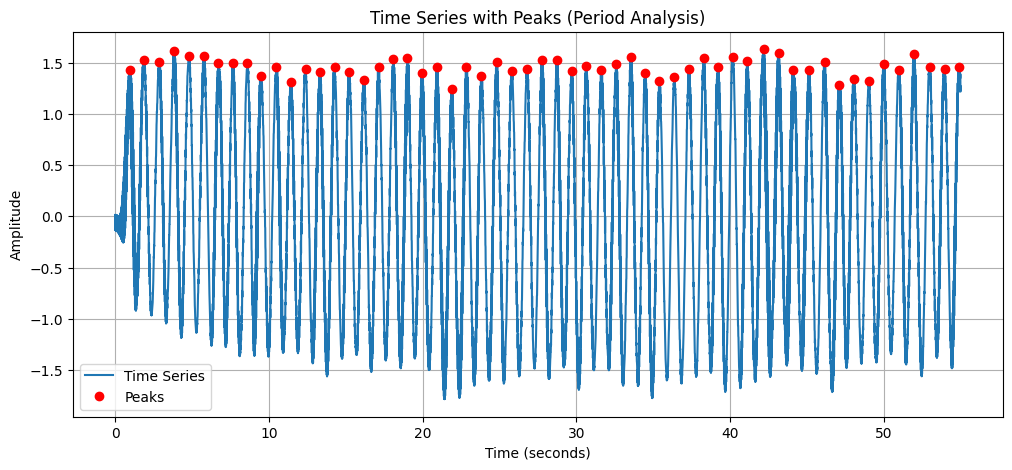

-0.016965672617158232 0.2178007444667376


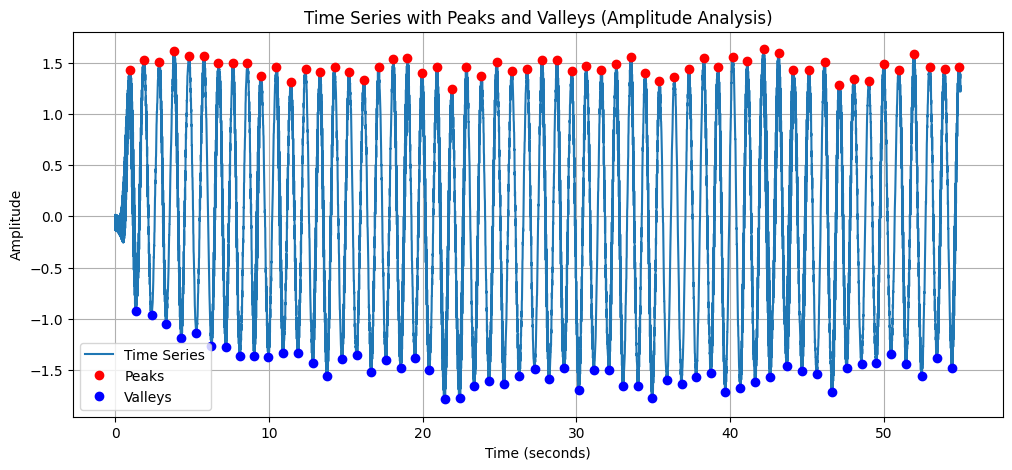

In [15]:

# Calculates mean and SD period
meanPeriod, sdPeriod, peaks, pkLocs = period(data, samplerate=120, DistFLT=0.5, AmpFLT=0.2)
print(meanPeriod, sdPeriod)
plot_period(data, 100, peaks, pkLocs)

# Calculates mean and SD amplitude
meanAmp, sdAmp, peaks, pkLocs, valleys, vLocs = amplitude(data, samplerate=120, DistFLT=0.5, AmpFLT=0.2)
print(meanAmp, sdAmp)
plot_amplitude(data, 100, peaks, pkLocs, valleys, vLocs)

###### Interpreting the Results

If your code ran successfully, you should see two graphs with two time series - one for participant A and one for participant B.

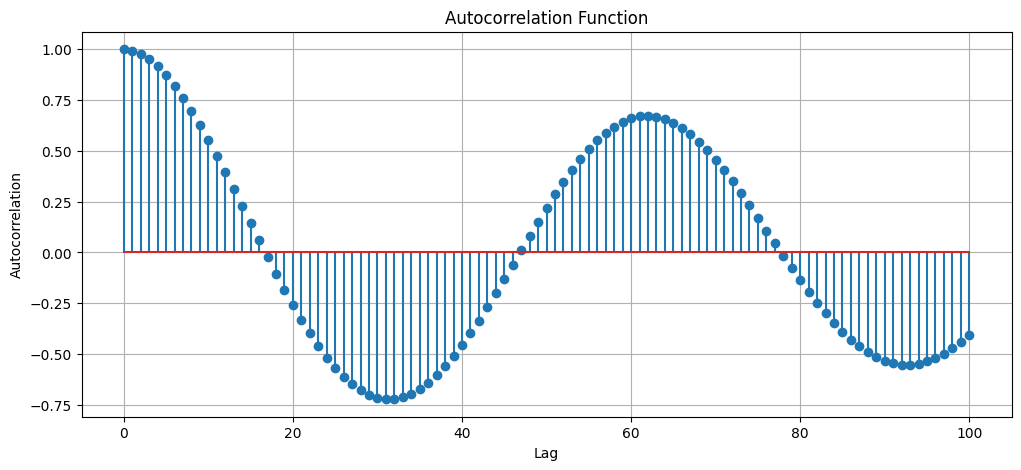

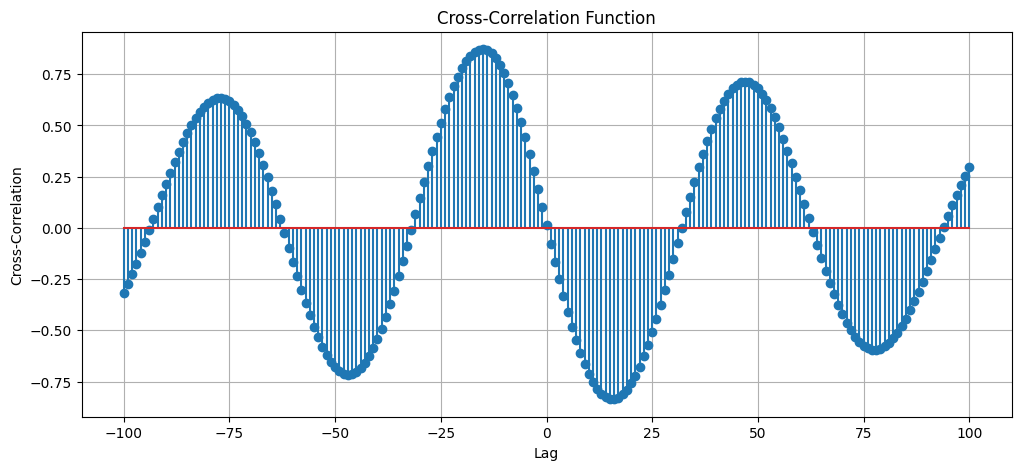

In [3]:
# Calculate auto-correlation for each participant
lags_x, corr_x = auto_correlation(data_x, 100)

#plot auto-correlation
plot_autocorrelation(lags_x, corr_x)

# Calculate cross-correlation between participants
cross_loags, cross_corr = cross_correlation(data_x, data_y, 100)

#plot cross-correlation
plot_crosscorrelation(cross_loags, cross_corr)

Average Coherence (across spectrum): 0.11291847633082697
 Coherence (peak ts1): 0.9684237998697663
 Coherence (peak ts2): 0.9684237998697663
 Coherence (peak freq average): 0.9684237998697663


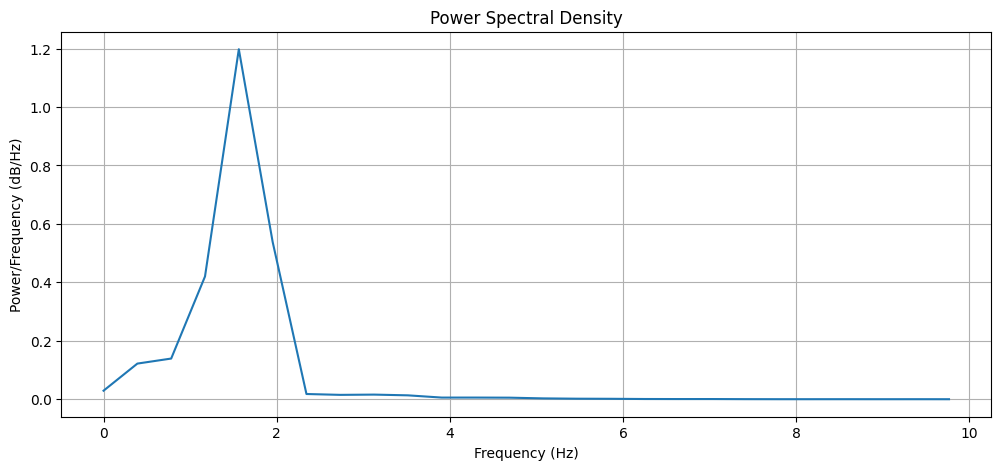

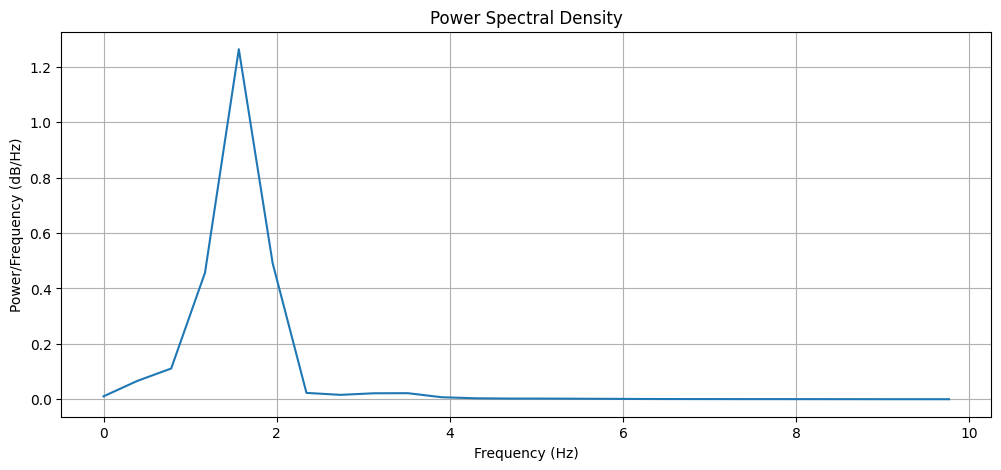

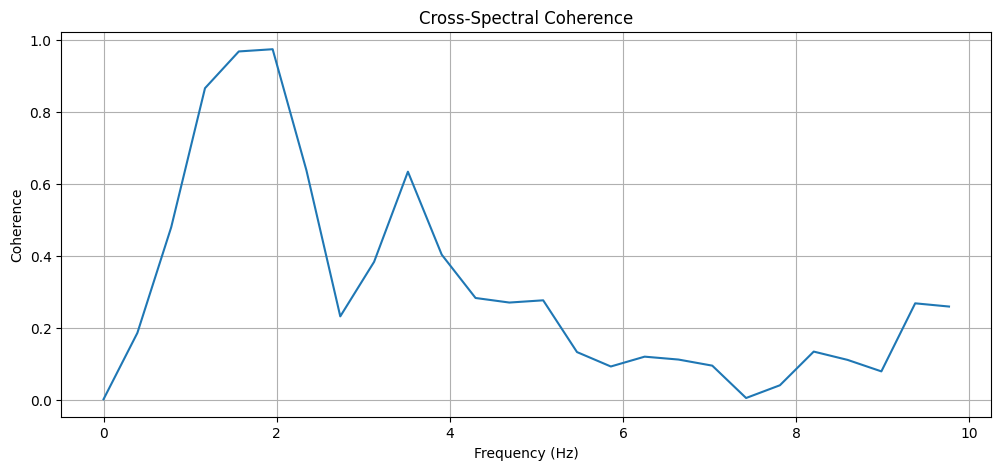

In [5]:

# Example 1D time series data
x = data_x
y = data_y

samplerate = 100
window_size = 256
window_overlap = 0.5

# Perform cross-spectral coherence analysis
cohere_stats, FP1, FP2, cohereFP = cross_spectral_coherence(x, y, samplerate, window_size, window_overlap)

# Print average coherence
print(f'Average Coherence (across spectrum): {cohere_stats[0]}')
print(f' Coherence (peak ts1): {cohere_stats[1]}')
print(f' Coherence (peak ts2): {cohere_stats[2]}')
print(f' Coherence (peak freq average): {cohere_stats[3]}')

# Plot the power spectral densities and coherence
plot_spectral_analysis(FP1, maxFreq=10)
plot_spectral_analysis(FP2, maxFreq=10)
plot_coherence(cohereFP, maxFreq=10)

RP: mean = 0.062120955396580364  sd = 0.28939672791803267   rho = 0.9589894232798036


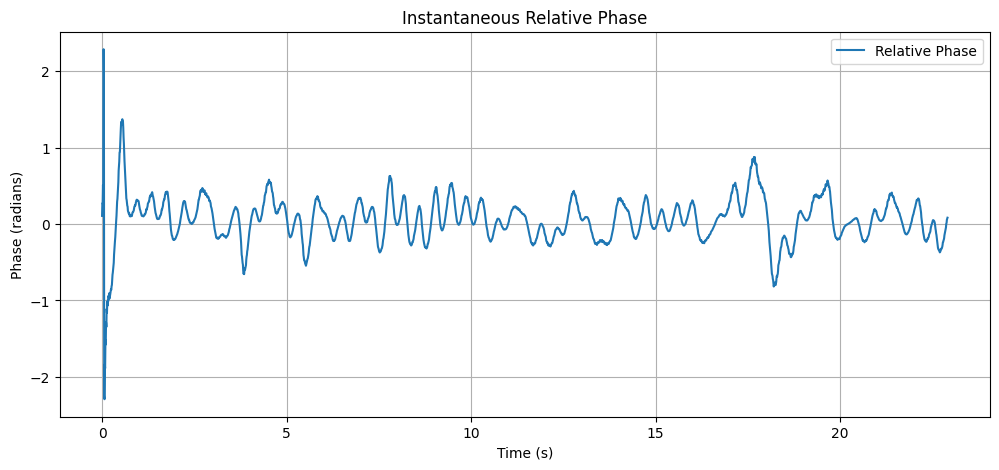

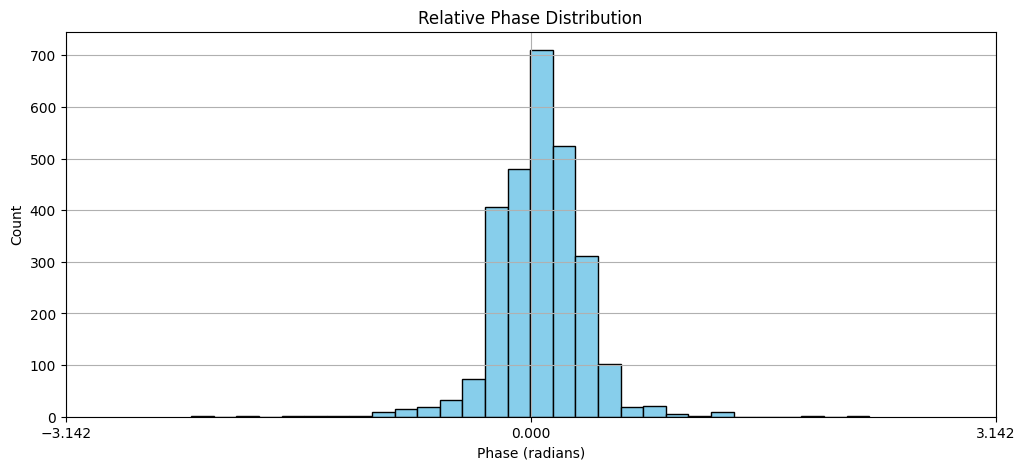

RP: mean = 0.1513236337572056  sd = 0.23049095024935554   rho = 0.9737866552921532


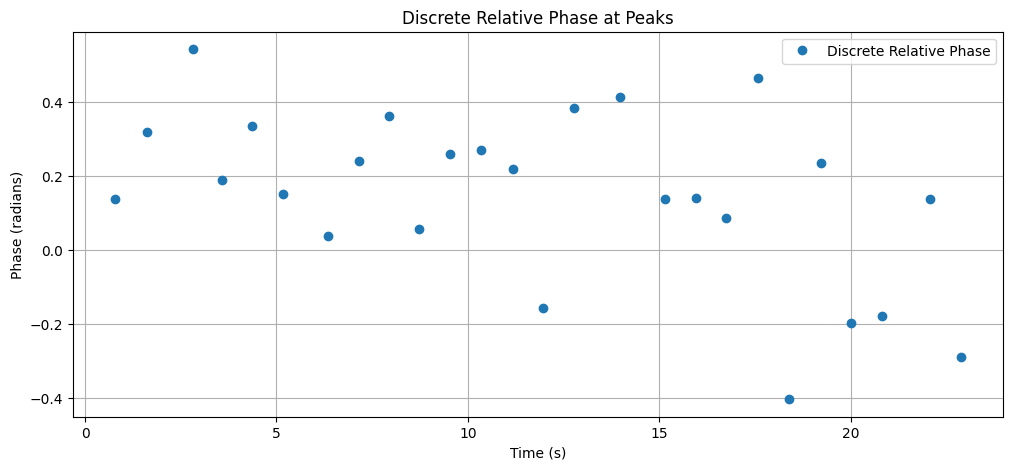

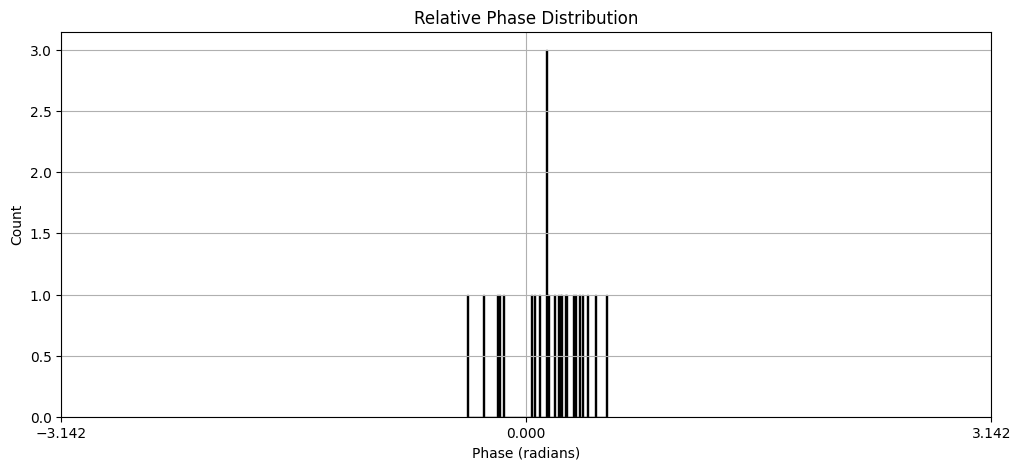

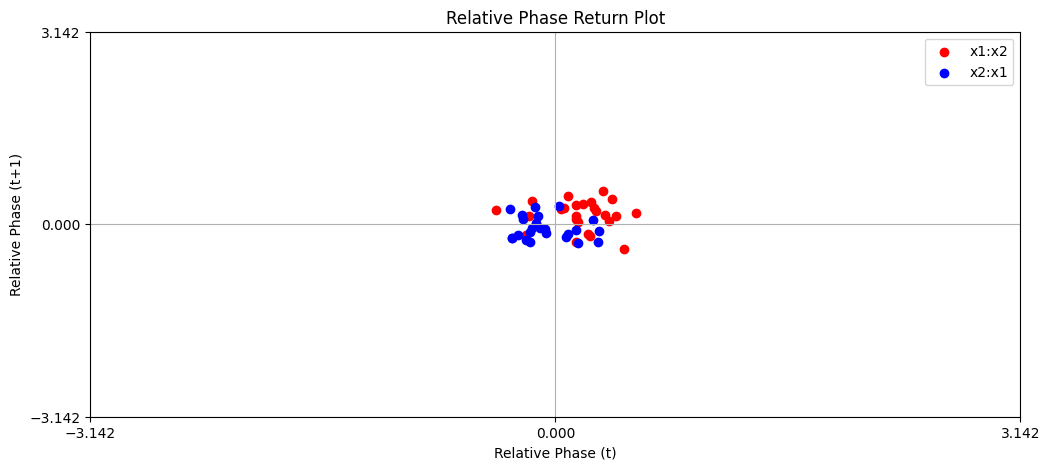

In [17]:
data = pd.read_csv(os.path.join('data/crqaContinuous', 'pendulums.txt'), sep='\t', header=None)

x1 = data[0]
x2 = data[1]
samplerate = 120  # 100 Hz sampling rate

# Perform synchrony analysis and plot results
meanRP, sdRP, rvRP, radians = irp(x1, x2)
print(f'RP: mean = {meanRP}  sd = {sdRP}   rho = {rvRP}')
plot_irp(radians, samplerate)
plot_rp_distribution(radians)

meanRP, sdRP, rvRP, radians, peaks = drp(x1, x2, samplerate)
print(f'RP: mean = {meanRP}  sd = {sdRP}   rho = {rvRP}')
plot_drp(radians, peaks, samplerate)
plot_rp_distribution(radians, samplerate) 

return_plot(x1, x2, samplerate)